In [4]:
"""
「あ～～～～～～～～」識別システム

息の続く限り「あ～～」と録音してできたMP3ファイルを用いて学習させ、
発声者が誰なのかを識別するシステム
（なぜこれをするのかは議事録（9/10）を参照）

"""

'\n「あ～～～～～～～～」識別システム\n\n息の続く限り「あ～～」と録音してできたMP3ファイルを用いて学習させ、\n発声者が誰なのかを識別するシステム\n（なぜこれをするのかは議事録（9/10）を参照）\n\n'

In [2]:
"""
学習用＆テスト用データの作成

１、パソコンのボイスレコーダーか何かを使って「あ～～」とできるだけ長く吹き込み、
'yourname_a'という名前で保存する。

２、おそらく上で作られたファイルは.m4aファイルになってしまうので、これを
.mp3に変換する（変換サイトが早い https://online-audio-converter.com/ja/)

３、

"""

"\n学習用＆テスト用データの作成\n\n１、パソコンのボイスレコーダーか何かを使って「あ～～」とできるだけ長く吹き込み、\n'yourname_a'という名前で保存する。\n\n２、おそらく上で作られたファイルは.m4aファイルになってしまうので、これを\n.mp3に変換する（変換サイトが早い https://online-audio-converter.com/ja/)\n\n３、\n\n"

In [22]:
#まずはimportから
from pydub import AudioSegment #これが音声データ解析のためのパッケージ
                               #pydubの他にffmpegもインストールする必要がある
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [23]:
tsujita_a = AudioSegment.from_file('data/tsujita_a.mp3', 'mp3') #ファイルの取得
kimura_a = AudioSegment.from_file('data/kimura_a.mp3', 'mp3')

frames_per_second_t = tsujita_a.frame_rate #元のサンプルレート
frames_per_second_k = kimura_a.frame_rate 
frames_per_second_t, frames_per_second_k #4.4 kHzだった

(44100, 44100)

In [7]:
duration_seconds_t = tsujita_a.duration_seconds #録音時間
duration_seconds_k = kimura_a.duration_seconds
duration_seconds_t, duration_seconds_k #30 sec 位

(30.97598639455782, 29.204013605442178)

In [8]:
channels_t = tsujita_a.channels # 1:mono, 2:streo
channels_k = kimura_a.channels
channels_t, channels_k #どっちもstreo→片方のみ取り出す必要あり

(2, 2)

In [9]:
#左右のマイクのデータが交互に入っていると思われるので１つおきに取り出せば
#ステレオからモノに変換できる

tsujita_a_data2 = np.array(tsujita_a.get_array_of_samples()) #streo
tsujita_a_data = tsujita_a_data2[::2] #mono
kimura_a_data2 = np.array(kimura_a.get_array_of_samples())
kimura_a_data = kimura_a_data2[::2] 

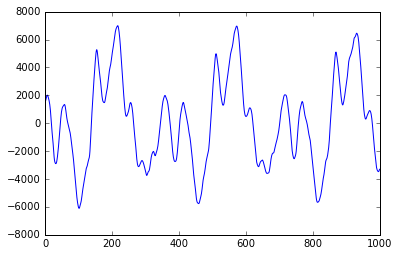

In [10]:
plt.plot(tsujita_a_data[600000:601000])  #辻田の「あ」

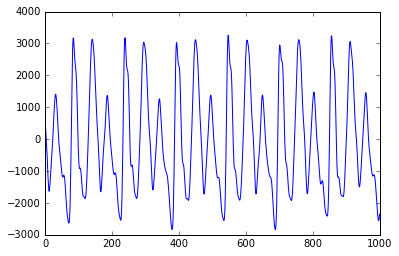

In [11]:
plt.plot(kimura_a_data[600000:601000]) #木村さんの「あ」

In [12]:
#木村さんの声の周波数が最も高いので、これをフーリエ変換して、最高周波数を求める

sample_for_max_freq = kimura_a_data[600000:601000] #上の切り出したデータ
spec = np.fft.fft(sample_for_max_freq) #フーリエ変換

In [13]:
abs_spec = np.abs(spec) #スペクトルの周波数のリスト（単位はHzでなくカウント数のままなので注意）
abs_spec

array([  48244.        ,   46000.75572388,   52800.43644582,
         56121.97684621,   59235.41455572,   89773.23862575,
        238915.12613911,  187424.91721358,   63749.89503181,
         48164.90039684,   44015.4190222 ,   49957.14752562,
         57798.12192752,  266927.73062346,   59577.03668612,
         70536.55419172,   93137.9306743 ,  144779.5303628 ,
        222921.78008138,  698788.34772251,  574674.93094323,
        181509.51751927,  106708.98566539,   78270.647779  ,
         59032.7503942 ,   44591.63504456,   78615.56222694,
         18120.13923475,   16362.00868038,   17624.16640787,
         20448.78548868,   45387.56275961,  195485.39589905,
        150524.88799283,   70402.93272505,   54254.82959336,
         38192.80013857,   37356.70830847,   39600.05336669,
        238430.32039109,   25788.61848691,   17160.19665834,
         27112.61388161,   14994.22213765,   12166.29254886,
         28883.83573962,   41097.36594198,   24052.04077242,
         21370.97344407,

/Users/yuri_kimura/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


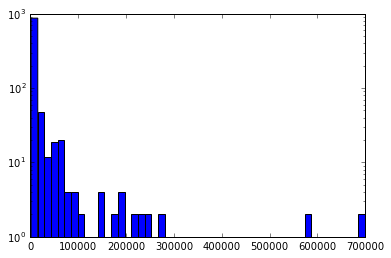

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.yscale('log') #log スケール
ax.hist(abs_spec, bins = 50)
fig.show()

In [13]:
#300000カウントはおかしい・・・
#調べたところによると、人の声の周波数は大きくて1000 Hz位
#とりあえずはカットせずに行く
#1000カウントで３周期分は入るし・・・まあなんとかなりそう

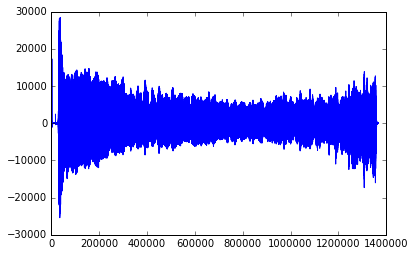

In [15]:
plt.plot(tsujita_a_data)

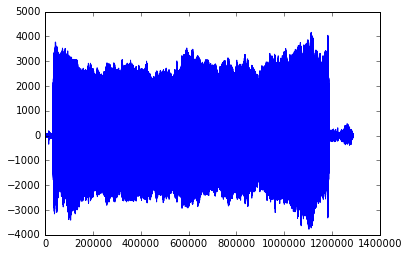

In [16]:
plt.plot(kimura_a_data)

In [17]:
tsujita_length = len(tsujita_a_data)
kimura_length = len(kimura_a_data)
tsujita_length, kimura_length

(1366041, 1287897)

In [24]:
#ファイルの取得
kimura2_a = AudioSegment.from_file('data/kimura2_a.mp3', 'mp3')

#元のサンプルレート
frames_per_second_k2 = kimura2_a.frame_rate 
frames_per_second_k2 

44100

In [25]:
#録音時間
duration_seconds_k2 = kimura2_a.duration_seconds
duration_seconds_k2 

30.334671201814057

In [27]:
#ステレオからモノへ
kimura2_a_data2 = np.array(kimura2_a.get_array_of_samples())
kimura2_a_data = kimura2_a_data2[::2] 

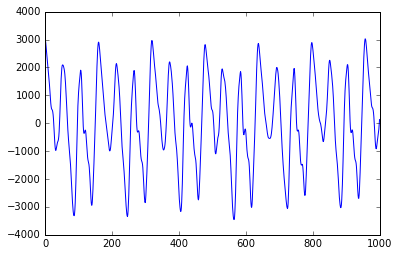

In [28]:
plt.plot(kimura2_a_data[600000:601000]) #木村2の「あ」

In [40]:
X = np.array([kimura2_a]) #音声データ
y = np.array([]) #結果 0:辻田、1:木村

In [41]:
# 1データは1,000カウント分、100,000～1,100,000までの1,000,000カウント分が使えるから合計1000データ
for i in range(1000):
    datum_t = np.array(tsujita_a_data[100000+1000*i : 101000+1000*i]) #1000個のデータ配列をXに追加
    np.append(X, datum_t, axis=0)
for i in range(1000):
    datum_k = np.array(kimura_a_data[100000+1000*i : 101000+1000*i])
    np.append(X, datum_k, axis=0)
#Xには2000個の音声データ配列が入っている

ValueError: all the input arrays must have same number of dimensions

In [42]:
for i in range(1000):
    np.append(y, 0)  #初めの1000個は0（辻田の音声であることを示す）
for i in range(1000):
    np.append(y, 1)

In [44]:
X.shape, y.shape

((1,
  30335,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1),
 (0,))